IMPORT DEPENDENCIES AND SET ENV VARIABLES

In [1]:
import ccxt
import os
from dotenv import load_dotenv
import socket
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Load API keys from .env
load_dotenv()
api_key = os.getenv("BINANCE_API_KEY")
api_secret = os.getenv("BINANCE_SECRET_KEY")

SET THE SOCKET TO USE IPv4 INSTEAD OF IPv6

In [2]:
_original_getaddrinfo = socket.getaddrinfo

def getaddrinfo_ipv4(host, port, family=0, type=0, proto=0, flags=0):
    return _original_getaddrinfo(host, port, socket.AF_INET, type, proto, flags)

socket.getaddrinfo = getaddrinfo_ipv4

CONNECT TO BINANCE

In [3]:
# Set up Binance exchange
binance = ccxt.binanceus({
    'apiKey': api_key,
    'secret': api_secret,
    'enableRateLimit': True,  # prevents API bans
})

TEST: CHECK BALANCE

In [4]:
# Fetch your account balance
balance = binance.fetch_balance()

# Print balances with non-zero values
print("Your Binance Balances:")
for asset, info in balance['total'].items():
    if info > 0:
        print(f"{asset}: {info}")

Your Binance Balances:
ETH: 8.68e-05
USDT: 9.3555745


TEST: CHECK CURRENCIES

In [5]:
#currencies = binance.fetch_currencies()
ticker = binance.fetchTicker('ETHBTC')

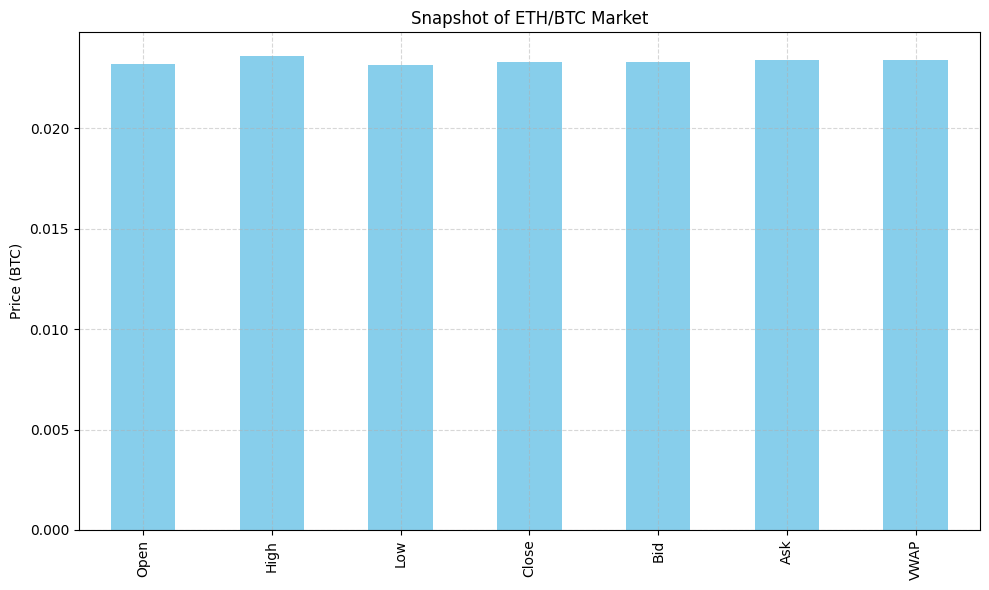

In [6]:
# Choose a subset of data to display
selected = {
    'Open': ticker['open'],
    'High': ticker['high'],
    'Low': ticker['low'],
    'Close': ticker['close'],
    'Bid': ticker['bid'],
    'Ask': ticker['ask'],
    'VWAP': ticker['vwap'],
}

# Create a DataFrame
df = pd.DataFrame.from_dict(selected, orient='index', columns=['Value'])

# Plot
df.plot(kind='bar', legend=False, figsize=(10, 6), color='skyblue')
plt.title(f"Snapshot of {ticker['symbol']} Market")
plt.ylabel("Price (BTC)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

              timestamp     open     high      low    close  volume
995 2025-06-21 06:08:00  0.02346  0.02346  0.02346  0.02346     0.0
996 2025-06-21 06:09:00  0.02346  0.02346  0.02346  0.02346     0.0
997 2025-06-21 06:10:00  0.02346  0.02346  0.02346  0.02346     0.0
998 2025-06-21 06:11:00  0.02346  0.02346  0.02346  0.02346     0.0
999 2025-06-21 06:12:00  0.02346  0.02346  0.02346  0.02346     0.0


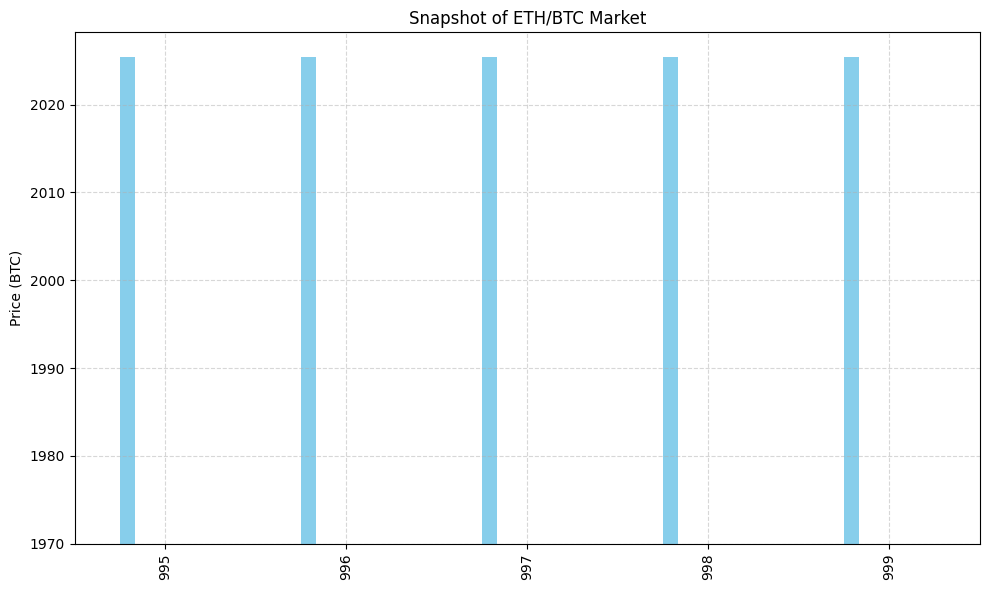

In [ ]:
# Define the symbol and timeframe
symbol = 'ETH/BTC'
timeframe = '1m'  # 1-minute candles

# Calculate timestamp 24 hours ago (in milliseconds)
since = binance.milliseconds() - 24 * 60 * 60 * 1000

# Fetch the candles
ohlcv = binance.fetch_ohlcv(symbol, timeframe=timeframe, since=since, limit=1440)

# Convert to DataFrame for easier handling

df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

print(df.tail())
df = df.tail()
df.plot(kind='bar', legend=False, figsize=(10, 6), color='skyblue')
plt.title(f"Snapshot of {ticker['symbol']} Market")
plt.ylabel("Price (BTC)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [29]:
# Define the symbol and timeframe
symbol = 'ETH/USD'
timeframe = '1h'  # 1-minute candles

# Calculate timestamp 24 hours ago (in milliseconds)
since = binance.milliseconds() - 7* 24 * 60 * 60 * 1000

# Fetch the candles
ohlcv = binance.fetch_ohlcv(symbol, timeframe=timeframe, since=since, limit=1440)


df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

print(df)


              timestamp     open     high      low    close  volume
0   2025-06-14 21:00:00  2510.00  2519.72  2510.00  2519.72  0.0433
1   2025-06-14 22:00:00  2519.89  2523.39  2517.10  2523.23  4.7524
2   2025-06-14 23:00:00  2530.49  2530.49  2530.49  2530.49  0.0714
3   2025-06-15 00:00:00  2530.49  2530.49  2530.49  2530.49  0.0000
4   2025-06-15 01:00:00  2530.49  2530.49  2530.49  2530.49  0.0000
..                  ...      ...      ...      ...      ...     ...
163 2025-06-21 16:00:00  2420.62  2420.62  2420.62  2420.62  0.0021
164 2025-06-21 17:00:00  2419.00  2419.00  2405.80  2405.80  0.0764
165 2025-06-21 18:00:00  2408.60  2419.54  2394.46  2394.46  3.1328
166 2025-06-21 19:00:00  2394.47  2394.47  2390.00  2394.47  7.1875
167 2025-06-21 20:00:00  2394.47  2394.47  2394.47  2394.47  0.0000

[168 rows x 6 columns]


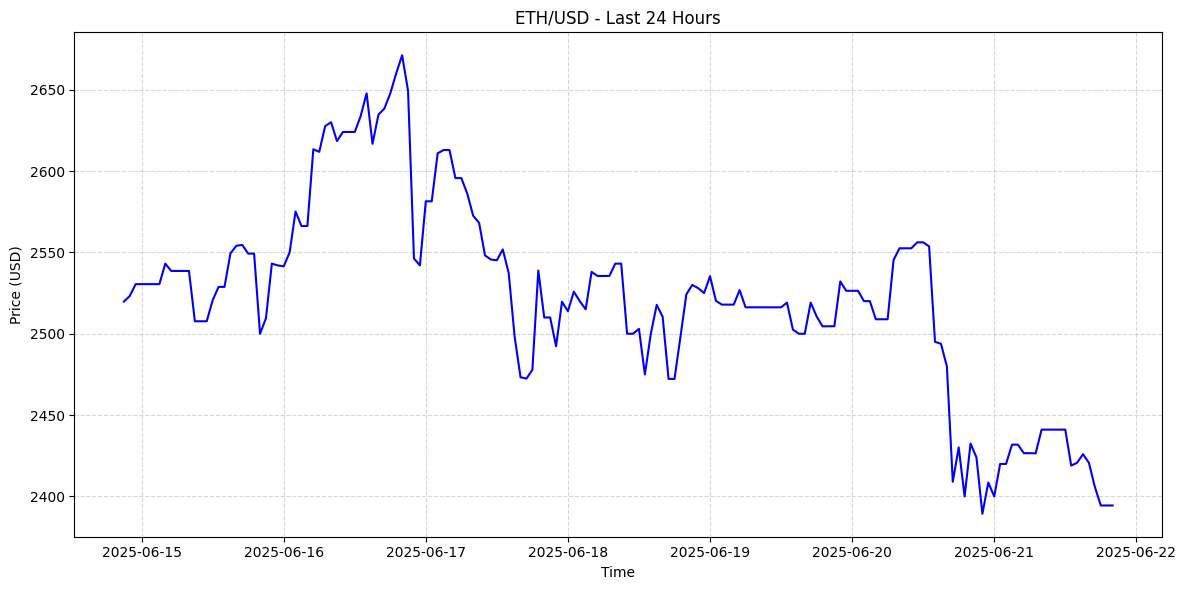

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label='Close Price', color='blue')
plt.title('ETH/USD - Last 24 Hours')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [8]:
order = binance.createMarketBuyOrderWithCost('ETH/USDT', 100)  # spends $100 of USDT to buy ETH

print(order)

InvalidOrder: binanceus order amount should be evenly divisible by lot size {"code":-1013,"msg":"Filter failure: MARKET_LOT_SIZE"}

BUYING TRANSACTION

In [7]:
ticker = binance.fetch_ticker('ETH/USDT')
price = ticker['last']
print(f"Current price: ${price}")
usdt_to_spend = 5
eth_amount = round(usdt_to_spend / price, 6)  # round to avoid precision errors
order = binance.create_market_buy_order('ETH/USDT', eth_amount)
print(order)

Current price: $2185.21
{'info': {'symbol': 'ETHUSDT', 'orderId': '1246837002', 'orderListId': '-1', 'clientOrderId': 'x-TKT5PX2Fe2f77e46cf874d205b4aeb', 'transactTime': '1750603496992', 'price': '0.00000000', 'origQty': '0.00220000', 'executedQty': '0.00220000', 'cummulativeQuoteQty': '4.79562600', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'workingTime': '1750603496992', 'fills': [{'price': '2179.83000000', 'qty': '0.00220000', 'commission': '0.00001320', 'commissionAsset': 'ETH', 'tradeId': '17766710'}], 'selfTradePreventionMode': 'EXPIRE_MAKER'}, 'id': '1246837002', 'clientOrderId': 'x-TKT5PX2Fe2f77e46cf874d205b4aeb', 'timestamp': 1750603496992, 'datetime': '2025-06-22T14:44:56.992Z', 'lastTradeTimestamp': 1750603496992, 'lastUpdateTimestamp': 1750603496992, 'symbol': 'ETH/USDT', 'type': 'market', 'timeInForce': 'GTC', 'postOnly': False, 'reduceOnly': None, 'side': 'buy', 'price': 2179.83, 'triggerPrice': None, 'amount': 0.0022, 'cost': 4.795626, 'av

SELLING TRANSACTION - SELL ALL ETH

In [8]:
# Step 1: Fetch your ETH balance
balance = binance.fetch_balance()
eth_balance = balance['free'].get('ETH', 0)

# Step 2: Round it and check if you have enough to sell
eth_to_sell = round(eth_balance, 6)

# Step 3: Sell all ETH (market order)
if eth_to_sell > 0:
    order = binance.create_market_sell_order('ETH/USDT', eth_to_sell)
    print("✅ Sold ETH:", order)
else:
    print("❌ No ETH available to sell.")


✅ Sold ETH: {'info': {'symbol': 'ETHUSDT', 'orderId': '1246846461', 'orderListId': '-1', 'clientOrderId': 'x-TKT5PX2Fdd1a3f6269f686faa98e34', 'transactTime': '1750604254809', 'price': '0.00000000', 'origQty': '0.00210000', 'executedQty': '0.00210000', 'cummulativeQuoteQty': '4.61372100', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'SELL', 'workingTime': '1750604254809', 'fills': [{'price': '2197.01000000', 'qty': '0.00210000', 'commission': '0.02768233', 'commissionAsset': 'USDT', 'tradeId': '17766745'}], 'selfTradePreventionMode': 'EXPIRE_MAKER'}, 'id': '1246846461', 'clientOrderId': 'x-TKT5PX2Fdd1a3f6269f686faa98e34', 'timestamp': 1750604254809, 'datetime': '2025-06-22T14:57:34.809Z', 'lastTradeTimestamp': 1750604254809, 'lastUpdateTimestamp': 1750604254809, 'symbol': 'ETH/USDT', 'type': 'market', 'timeInForce': 'GTC', 'postOnly': False, 'reduceOnly': None, 'side': 'sell', 'price': 2197.01, 'triggerPrice': None, 'amount': 0.0021, 'cost': 4.613721, 'average': 2

In [ ]:
balance = binance.fetch_balance()
tickers = binance.fetch_tickers()

total_usd = 0
asset_values = {}

for asset, amount in balance['total'].items():
    if amount > 0:
        if asset == 'USDT':
            usd_value = amount
        else:
            symbol = f"{asset}/USDT"
            if symbol in tickers:
                price = tickers[symbol]['last']
                usd_value = amount * price
            else:
                continue  # skip non-tradeable assets
        asset_values[asset] = usd_value
        total_usd += usd_value


0.0
8.68e-05
0.0
0.0
9.3555745
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [7]:
total_usd

9.54522382

In [8]:
asset_values

{'ETH': 0.18964932, 'USDT': 9.3555745}

In [12]:
print(os.getcwd())

/home/ethan/Documents/git/TraderBot


In [ ]:
def performance_over_period():
    try:
        df = pd.read_csv(r"/home/ethan/Documents/git/TraderBot/data/historical_gross_balance.csv", parse_dates=["timestamp"])
        print(df)
        #1 week
        since = 7 * 24 * 60 * 60 * 1000
        sorted_df = df.sort_values(by="timestamp", ascending=False)
        print(sorted_df)
        timestamps_in_period = []
        for index, row in sorted_df.iterrows():
            if row['timestamp'] > sorted_df[first row]["timestamp"] - since:
                timestamps_in_period.append(row)

    except FileNotFoundError:
        print("Cannot check performance record.")


performance_over_period()

       timestamp  total_usd
0  1750623358556   9.541069
1  1750623389753   9.541069
2  1750623566418   9.539751
3  1750623583839   9.540632
4  1750623634284   9.540458
5  1750623778244   9.540193
6  1750623817058   9.541393
       timestamp  total_usd
6  1750623817058   9.541393
5  1750623778244   9.540193
4  1750623634284   9.540458
3  1750623583839   9.540632
2  1750623566418   9.539751
1  1750623389753   9.541069
0  1750623358556   9.541069


/tmp/ipykernel_39530/3084676364.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r"/home/ethan/Documents/git/TraderBot/data/historical_gross_balance.csv", parse_dates=["timestamp"])


In [26]:
sorted_df

NameError: name 'sorted_df' is not defined